<font size=6> **实验2 线性回归**</font>

- 掌握数据准备(行列增删、维度变换、训练集与测试集随机划分)、数据可视化相关操作，能够利用sklearn中的LinearRegression、SGDRegressor、Ridge、Lasso进行建模、训练、预测、评价等基本操作；
- 理解Ridge、Lasso回归中超参数alpha的作用及调优；
- 能够利用numpy、pandas等工具按要求生成数据集，用不同模型得到相应参数，分别计算回归指标，检验模型的功效；
- 了解多项式回归、批量梯度下降法代码实现等内容。


**(实验报告提交题)编程题**：请参考相关资料，先生成相应数据集，再用LinearRegression、SGDRegressor、Ridge、Lasso四种模型进行求解，并对所得结果进行比较，以理解不同模型的特点。具体要求如下：
- (1)假定多元线性模型为$y=3+0.1*x_1-0.8*x_2+5*x_3+20*x_4+15x_3^3$，自变量x1~x4取值范围均为[0,10 )，请参考“用numpy、pandas生成数据集参考资料.doc”文档内容，用numpy中randdom库函数生成200个样本点数据，并存放在pandas中；
- (2)根据x1、y数据绘制散点图，查看是否为线性趋势？
- (3)用train_test_split()完成训练集、测试集划分(测试数据比例为25%)；
- (4)请用LinearRegression进行建模、训练，输出模型参数(含截距)，所得结果与给定参数有多大差异？分别计算所得模型在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？
- (5)请用SGDRegressor进行建模、训练，输出模型参数(含截距)，所得结果与给定参数有多大差异？分别计算所得模型在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？
- (6)请用Ridge模型进行求解，alpha参数分别选用默认值1、20建模、训练，输出相应的模型参数(含截距)，所得结果与给定模型有多大差异？分别计算在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？alpha参数是否影响模型参数大小？
- (7)请用Lasso模型进行求解，alpha参数分别选用默认值1、200建模、训练，输出相应的模型参数(含截距)，所得结果与给定模型有多大差异？分别计算在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？alpha参数是否影响模型参数个数？

- [说明：请提交pdf文档，命名格式：实验X 实验名称(学号_姓名).pdf]  
-**（为确保大家的结果一致，随机种子统一设置为42）**


# 导入库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

# 数据集准备

## 数据获取

(1)构造数据集$y=3+0.1*x_1-0.8*x_2+5*x_3+20*x_4+15x_3^3$ ，自变量x1~x4取值范围均为[0,10 )，请参考“用numpy、pandas生成数据集参考资料.doc”文档内容，用numpy中random库函数生成200个样本点数据，并存放在pandas的dataframe中

In [ ]:
# 设置随机种子，确保每次生成的随机数相同
np.random.seed(42)

In [ ]:
x = 200 of
x1 = np.random.uniform(0, 10, x)
x2 = np.random.uniform(0, 10, x)
x3 = np.random.uniform(0, 10, x)
x4 = np.random.uniform(0, 10, x)

y = 3 + 0.1 * x1 - 0.8 * x2 + 5 * x3 + 20 * x4 + 15 * x3 ** 3

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})
df.head()

,x1,x2,x3,x4,y
0,7.072386,1.851329,7.582632,1.670419,6613.147790
1,1.525390,5.419009,0.245869,1.676192,33.793468
2,5.762884,8.729458,0.221236,0.366714,5.195611
3,6.067150,7.322249,3.236102,7.364020,669.554111
4,4.241307,8.065611,4.886432,6.638045,1904.280612


## 特征分析

(2)根据x1、y数据绘制散点图，查看是否为线性趋势？

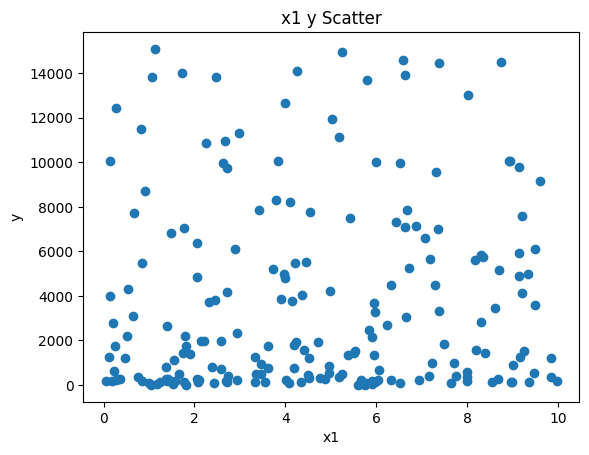

In [ ]:
plt.scatter(df['x1'], df['y'])
plt.title('x1 y Scatter')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

# 建模

## 数据集划分

(3)用train_test_split()完成训练集、测试集划分(测试数据比例为25%)；

In [ ]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## 模型训练

### LinearRegression回归模型

(4)请用LinearRegression进行建模、训练，输出模型参数(含截距)，所得结果与给定参数有多大差异？分别计算所得模型在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('LinearRegression模型的参数', lr.intercept_, lr.coef_)
print('训练集的R方值', lr.score(X_train, y_train))
print('测试集的R方值', lr.score(X_test, y_test))
#lr.score(X_train, y_train)

print('训练集的均方差', mean_squared_error(y_train, lr.predict(X_train)))
print('测试集的均方差', mean_squared_error(y_test, lr.predict(X_test)))

LinearRegression模型的参数 -1867.095881660362 [ -71.88206108  -54.08403096 1283.73632131   -8.75568278]
训练集的R方值 0.835250040314458
测试集的R方值 0.8328699774685397
训练集的均方差 2742213.7778952457
测试集的均方差 3667230.951034602


**训练集的评估效果好于测试集，模型过拟合**

### SGDRegressor回归模型

(5)请用SGDRegressor进行建模、训练，输出模型参数(含截距)，所得结果与给定参数有多大差异？分别计算所得模型在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？

In [ ]:
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

print('SGDRegressor模型的参数', sgd.intercept_, sgd.coef_)
print('训练集的R方值', sgd.score(X_train, y_train))
print('测试集的R方值', sgd.score(X_test, y_test))

print('训练集的均方差', mean_squared_error(y_train, sgd.predict(X_train)))
print('测试集的均方差', mean_squared_error(y_test, sgd.predict(X_test)))


SGDRegressor模型的参数 [-385.35980855] [-110.8406072  -113.61996282 1305.67873384  -24.72932374]
训练集的R方值 0.7726031153043953
测试集的R方值 0.782902823349388
训练集的均方差 3784953.0977303586
测试集的均方差 4763629.379906808


**训练集的评估效果好于测试集，模型过拟合**

### Ridge回归模型

(6)请用Ridge模型进行求解，alpha参数分别选用默认值1、20建模、训练，输出相应的模型参数(含截距)，所得结果与给定模型有多大差异？分别计算在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？alpha参数是否影响模型参数大小？

In [ ]:
for alpha in range(1, 20):
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)

    print(f"Ridge模型(alpha={alpha})的参数")
    print("截距:", ridge.intercept_)
    print("系数:", ridge.coef_)
    print("训练集的R方值:", ridge.score(X_train, y_train))
    print("测试集的R方值:", ridge.score(X_test, y_test))
    print("训练集的均方差:", mean_squared_error(y_train, ridge.predict(X_train)))
    print("测试集的均方差:", mean_squared_error(y_test, ridge.predict(X_test)))


Ridge模型(alpha=1)的参数
截距: -1863.7756033330475
系数: [ -71.70596928  -54.01711034 1282.70661916   -8.65966816]
训练集的R方值: 0.8352495044566555
测试集的R方值: 0.8326977570289391
训练集的均方差: 2742222.6970880143
测试集的均方差: 3671009.8778661694
Ridge模型(alpha=2)的参数
截距: -1860.4584935045882
系数: [ -71.53037227  -53.95038083 1281.67859911   -8.5639781 ]
训练集的R方值: 0.835247900416429
测试集的R方值: 0.8325249903273816
训练集的均方差: 2742249.395857578
测试集的均方差: 3674800.790986764
Ridge模型(alpha=3)的参数
截距: -1857.1445508879629
系数: [ -71.35526828  -53.88384163 1280.65225695   -8.46861129]
训练集的R方值: 0.8352452334734711
测试集的R方值: 0.8323516808231921
训练集的均方差: 2742293.7863250356
测试集的均方差: 3678603.614490558
Ridge模型(alpha=4)的参数
截距: -1853.8337741749879
系数: [ -71.18065554  -53.81749196 1279.62758851   -8.37356645]
训练集的R方值: 0.835241508880825
测试集的R方值: 0.8321778319566804
训练集的均方差: 2742355.7810550523
测试集的均方差: 3682418.272888954
Ridge模型(alpha=5)的参数
截距: -1850.5261620365168
系数: [ -71.00653228  -53.75133105 1278.60458959   -8.2788423 ]
训练集的R方值: 0.8352367318650382


**结论：alpha参数对模型参数大小有影响，alpha越大，模型参数越小。**  <br>
**alpha参数对模型的过拟合有一定的抑制作用，alpha越大，模型的过拟合程度越低。**

### Lasso回归模型

(7)请用Lasso模型进行求解，alpha参数分别选用默认值1、200建模、训练，输出相应的模型参数(含截距)，所得结果与给定模型有多大差异？分别计算在训练集、测试集中的R方值及均方差，判断是否为过拟合、欠拟合？alpha参数是否影响模型参数个数？

In [ ]:
# alpha=1
lasso1 = Lasso(alpha=1, random_state=42)
lasso1.fit(X_train, y_train)

print('Lasso模型(alpha=1)的参数', lasso1.intercept_, lasso1.coef_)
print('训练集的R方值', lasso1.score(X_train, y_train))
print('测试集的R方值', lasso1.score(X_test, y_test))

print('训练集的均方差', mean_squared_error(y_train, lasso1.predict(X_train)))
print('测试集的均方差', mean_squared_error(y_test, lasso1.predict(X_test)))

# alpha=200
lasso200 = Lasso(alpha=200, random_state=42)
lasso200.fit(X_train, y_train)

print('Lasso模型(alpha=200)的参数', lasso200.intercept_, lasso200.coef_)
print('训练集的R方值', lasso200.score(X_train, y_train))
print('测试集的R方值', lasso200.score(X_test, y_test))

print('训练集的均方差', mean_squared_error(y_train, lasso200.predict(X_train)))
print('测试集的均方差', mean_squared_error(y_test, lasso200.predict(X_test)))

Lasso模型(alpha=1)的参数 -1868.8307714608113 [ -71.72505145  -53.92958971 1283.59256171   -8.58333662]
训练集的R方值 0.8352500025593228
测试集的R方值 0.8328591012866532
训练集的均方差 2742214.406318173
测试集的均方差 3667469.6003822144
Lasso模型(alpha=200)的参数 -2063.4104008605123 [ -41.33780993  -28.65642324 1256.75343446   -0.        ]
训练集的R方值 0.8342507395735327
测试集的R方值 0.8312336969119624
训练集的均方差 2758846.8396893525
测试集的均方差 3703134.845563948


In [ ]:
!jupyter nbconvert --to pdf <实验2_线性回归_2240709330_陈颂华.ipynb>.ipynb

/bin/bash: line 1: 实验2_线性回归_2240709330_陈颂华.ipynb: No such file or directory


In [ ]:
!jupyter nbconvert --to pdf --output <实验2_线性回归_2240709330_陈颂华.ipynb>.pdf <实验2_线性回归_2240709330_陈颂华.ipynb>.ipynb

/bin/bash: line 1: 实验2_线性回归_2240709330_陈颂华.ipynb: No such file or directory
